# Gradient Descent

In this notebook you can see how the three variants of Gradient Descent (Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent) can be implemented in Python. 
Remember the iterative steps of Gradient Descent to better understand the code.
It might also help you to understand the influence of the hyper-parameters of Gradient Descent by trying to modify some of them here.

**Task:**

Read through the notebook and try to understand what happens at each step. As you can see proper comments describing the code are missing. Add them wherever its necessary (or helpful for you to understand the code). 

# Gradient Descent with Linear Regression

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

With `plt.style.use` you can set layouts (background color, gird, etc.) for the whole notebook. In this notebook we will use the ggplot layout. But there are more ([click here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)).

In [25]:
plt.style.use(['ggplot'])

We want to use gradient descent to find optimal parameters for a linear regression problem. Here we will create our own data so that we know what the values of the parameters should be for a perfect fit.

$y_{i}=\beta_{0} + \beta_{1}*x_{i} + \varepsilon_{i}$  


## Create Data

#### Generate some data with:

$\beta_{0} = 4$ and  $\beta_{1} = 3$

We'll also add some Gaussian noise to the data.

In [3]:
np.random.seed(42)
# create 100 data points for X
X = 2 * np.random.rand(100,1)
# y = b_0 + b_1*X + random noise
y = 4 + 3 * X + np.random.randn(100,1)
print("X dimensions: ", X.shape)
print("y dimensions: ", y.shape)

X dimensions:  (100, 1)
y dimensions:  (100, 1)


Let's plot our data to check the relation between X and Y

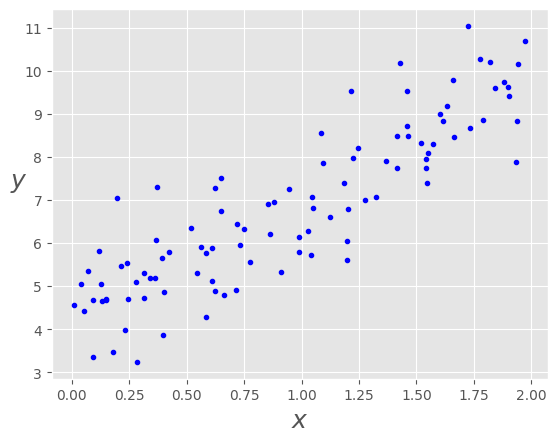

In [4]:
plt.plot(X, y, 'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18);

These are the 100 data points we have just created.

##  Analytical way of Linear Regression

Remember that there is a closed formula to find the best parameters for linear regression, called the **Normal-Equation**:


$$ b = (X^TX)^{-1}X^Ty $$

*Remember:* [How to multiply matrices](https://www.mathsisfun.com/algebra/matrix-multiplying.html) 

We were using this formula before to solve linear regression tasks. 
Let's try it out and see which results for $b_{0}$ and $b_{1}$ it will come up with.


In [5]:
# np.c_ can be used to concatenate arrays
X_b = np.c_[np.ones((100,1)), X]
print("X_b dimensions: ", X_b.shape)

# Here we implement the formula above with numpy .T for transpose and .dot for the dot product
# and .linalg.inv for matrix inversion 
b_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(b_best)

X_b dimensions:  (100, 2)
[[4.21509616]
 [2.77011339]]


This is close to our real parameters 4 and 3. It cannot be accurate due to the noise we have added to the data.

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(b_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Let's plot a prediction line with the calculated parameters.

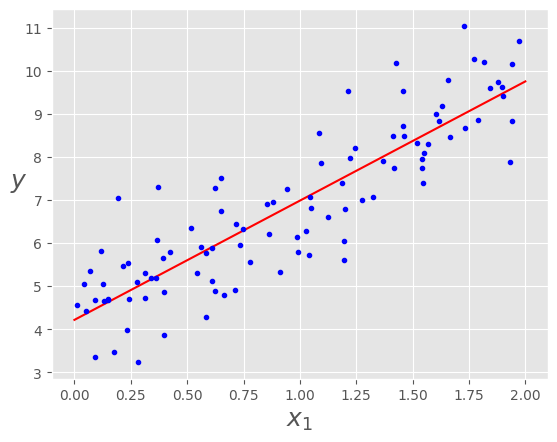

In [7]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18);

## Gradient Descent

Now, let's use gradient descent to find the optimal parameters.

### Cost Function & Gradients

The general equations for calculating the cost function and gradients for linear regression are shown below. 

**Please note the cost function is for Linear regression. For other algorithms the cost function will be different and the gradients would have to be derived from the cost functions.**



**Cost**

$$J(b) = \frac{ 1 }{ 2n } \sum_{i=1}^{n} (\hat{y}_i - y_i)^2$$

**Gradient**

$$ \frac{\partial J(b)}{\partial b_j} = \frac{ 1 }{ n }\sum_{i=1}^{n}(\hat{y}_i - y_i) x_{i,j} $$


**Updating the parameters with the gradients**

$$ b_0: = b_0 -\alpha (\frac{ 1 }{ n } \sum_{i=1}^{n}(\hat{y}_i - y_i) * 1) $$

$$ b_1: = b_1 -\alpha (\frac{ 1 }{ n } \sum_{i=1}^{n}(\hat{y}_i - y_i)  x_{i,1})$$


$$ b_2: = b_2 -\alpha (\frac{ 1 }{ n } \sum_{i=1}^{n}(\hat{y}_i - y_i) x_{i,2})$$



$$ b_j: = b_j -\alpha (\frac{ 1 }{ n } \sum_{i=1}^{n}(\hat{y}_i - y_i) x_{i,j})$$


Next, the three variants of the gradient descent method are applied: **batch gradient descent**, **stochastic gradient decent** and **mini-batch gradient descent**. Remind yourself which steps are iteratively repeated in the gradient descent procedure.

## Batch Gradient Descent

Batch gradient descent, computes the gradient of the cost function with respect to the parameters $ b $ for the entire training dataset:

$$ b = b - \alpha \frac{\partial}{\partial b} J(b) $$

As we need to calculate the gradients for the whole dataset to perform just one update, batch gradient descent can be very slow and is intractable for datasets that don't fit in memory. Batch gradient descent also doesn't allow us to update our model online, i.e. with new examples on-the-fly.

We then update our parameters in the opposite direction of the gradients with the learning rate determining how big of an update we perform. Batch gradient descent is guaranteed to converge to the global minimum for convex error surfaces and to a local minimum for non-convex surfaces.

In [8]:
def cal_cost(b, X, y):
    """
    Compute the mean squared error cost for linear regression.

    Parameters
    ----------
    b : ndarray of shape (j, 1)
        Parameter vector (including bias weight).
    X : ndarray of shape (n, j)
        Feature matrix including the bias column (all ones).
    y : ndarray of shape (n, 1)
        True target values.

    Returns
    -------
    cost : float
        The mean squared error cost.
    """

    n = y.shape[0]
    
    predictions = X.dot(b)
    cost = 1/(2*n) * np.sum(np.square(predictions-y))
    return cost

In [9]:
def batch_gradient_descent(X, y, b, learning_rate=0.01, iterations=1000):
    """
        Perform batch gradient descent for linear regression.

        Parameters
        ----------
        X : ndarray of shape (n, j)
            Feature matrix including bias column.
        y : ndarray of shape (n, 1)
            Target values.
        b : ndarray of shape (j, 1)
            Initial parameter vector.
        learning_rate : float, optional
            Step size for parameter updates.
        iterations : int, optional
            Number of gradient descent iterations.

        Returns
        -------
        b : ndarray of shape (j, 1)
            Final learned parameter vector.
        cost_history : ndarray of shape (iterations,)
            Cost value at each iteration.
        b_history : ndarray of shape (iterations, j)
            Parameter values at each iteration.
    """
    
    n = y.shape[0]
    cost_history = np.zeros(iterations)
    b_history = np.zeros((iterations, b.shape[0]))
    
    for it in range(iterations):
        
        prediction = np.dot(X,b)
        
        b = b - learning_rate * (1/n) * (X.T.dot((prediction - y)))
        b_history[it,:] = b.T
        cost_history[it]  = cal_cost(b, X, y)
        
    return b, cost_history, b_history

Let's start with 1000 iterations and a learning rate of 0.01. Start with initial parameters from a Gaussian distribution.

In [10]:
lr = 0.01
n_iter = 1000

b = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
b, cost_history, b_history = batch_gradient_descent(X_b, y, b, lr, n_iter)


print(f"b_0:             {b[0, 0]:0.3f},\n"
      f"b_1:             {b[1, 0]:0.3f}")

print(f"Final cost:      {cost_history[-1]:0.3f}")

b_0:             3.903,
b_1:             3.046
Final cost:      0.418


Let's plot the cost history over iterations:

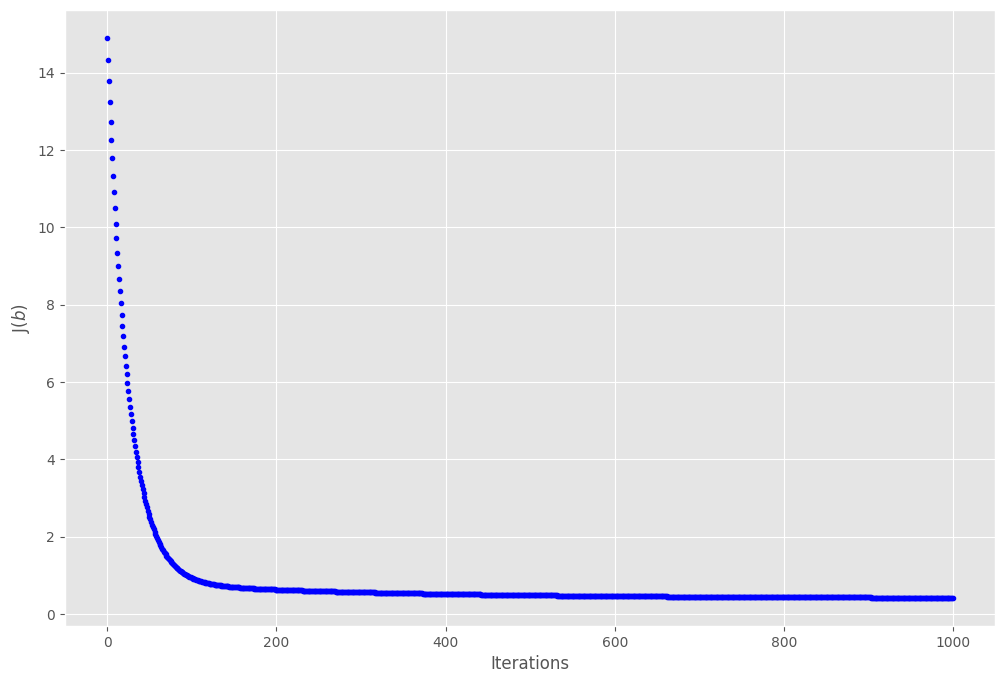

In [11]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J$(b)$')
ax.set_xlabel('Iterations')
ax.plot(range(n_iter), cost_history, 'b.');

After around 150 iterations the cost is flat so the remaining iterations are not needed or will not result in any further optimization. Let us zoom in till iteration 200 and see the curve.

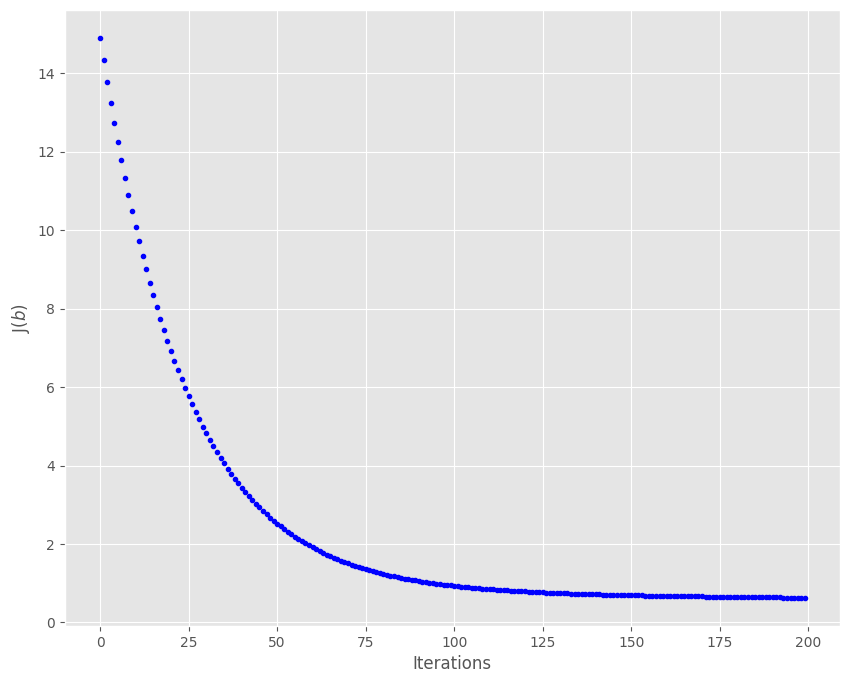

In [16]:
fig,ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('J$(b)$')
ax.set_xlabel('Iterations')
ax.plot(range(200), cost_history[:200], 'b.');

It is worth pointing out that the cost drops faster initially and then the gain in cost reduction is not so great. 

It would be great to see the effect of different learning rates and iterations together. Let us  build a function which can show the effects together and also show how gradient decent is actually working.



In [13]:
def plot_GD(n_iter,lr, ax, ax1=None):
    """
    Plot gradient descent steps for linear regression.

    Parameters
    ----------
    n_iter : int
        Number of gradient descent iterations.
    lr : float
        Learning rate.
    ax : matplotlib.axes.Axes
        Axis for plotting data points and prediction lines.
    ax1 : matplotlib.axes.Axes, optional
        Axis for plotting cost vs iterations.
    """
    
    ax.plot(X, y, 'b.')
    b = np.random.randn(2,1)

    transparency = 0.1
    cost_history = np.zeros(n_iter)
    for i in range(n_iter):
        #pred_prev = X_b.dot(b)
        b, h, _ = batch_gradient_descent(X_b, y, b, lr, 1)
        pred = X_b.dot(b)

        cost_history[i] = h[0]

        if i % 25 == 0:
            ax.plot(X, pred, 'r-', alpha=transparency)
            if transparency < 0.8:
                transparency = transparency+0.2
    if ax1 is not None:
        ax1.plot(range(n_iter), cost_history, 'b.')  

Plot the graphs for different iterations and learning rates combinations.

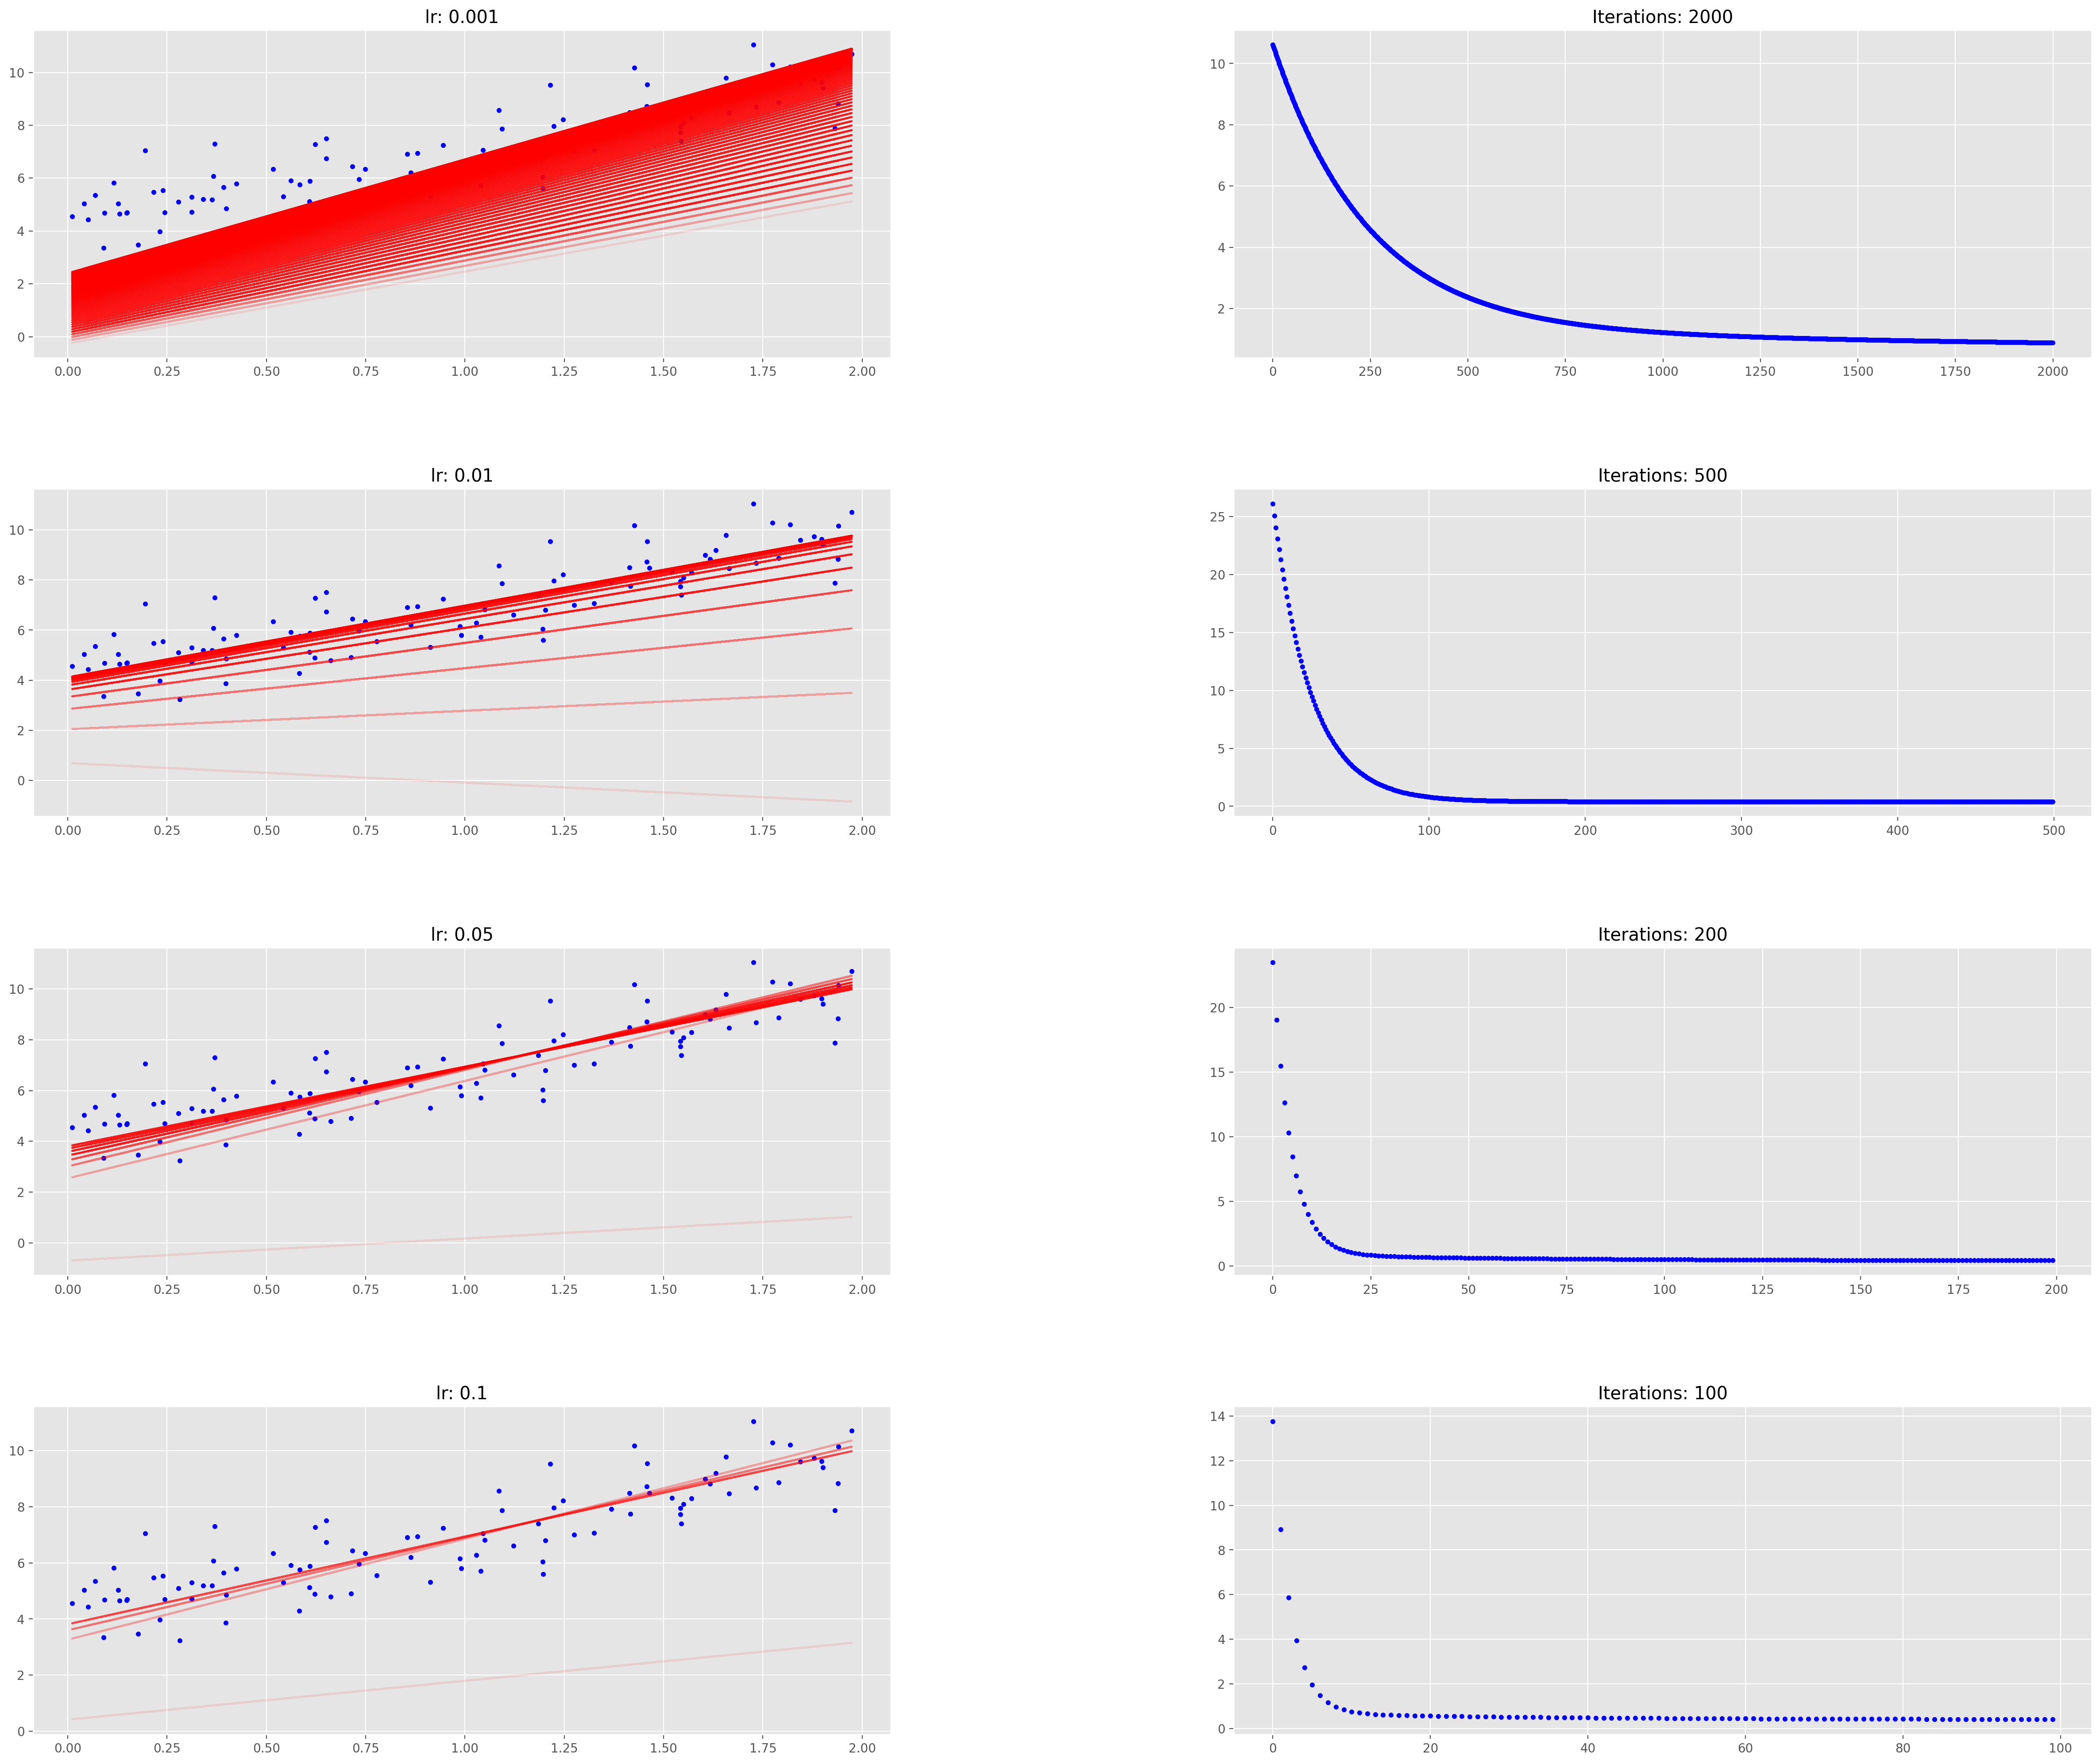

In [14]:
fig = plt.figure(figsize=(30,25), dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

iterations_lr = [(2000,0.001), (500,0.01), (200,0.05), (100,0.1)]

for i, (n_iter, lr) in enumerate(iterations_lr):
    ax  = fig.add_subplot(4, 2, 2*i + 1)
    ax1 = fig.add_subplot(4, 2, 2*i + 2)

    ax.set_title(f"lr: {lr}")
    ax1.set_title(f"Iterations: {n_iter}")

    plot_GD(n_iter, lr, ax, ax1)


See how useful it is to visualize the effect of learning rates and iterations on gradient descent. The red lines show how the gradient descent starts and then slowly gets closer to the final value.

You can always plot individual graphs to zoom in:

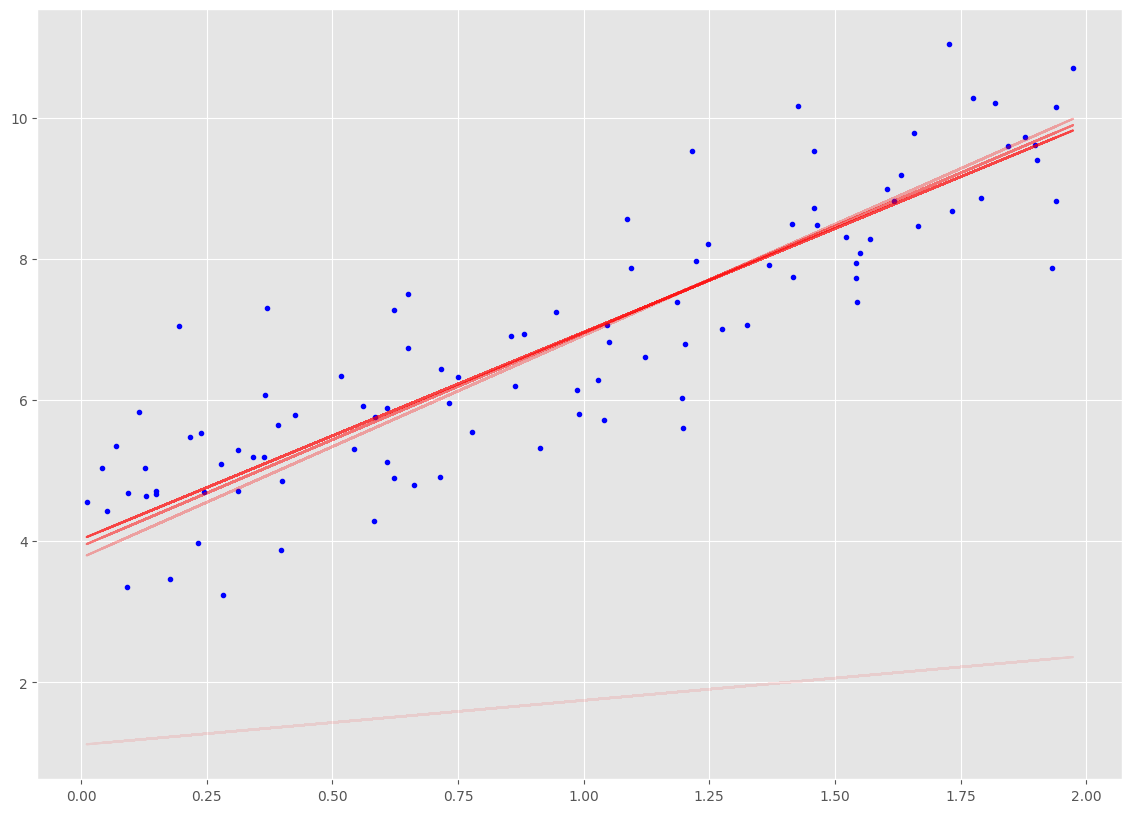

In [15]:
_, ax = plt.subplots(figsize=(14,10))
plot_GD(100, 0.1, ax)

## Stochastic Gradient Descent

Stochastic gradient descent (SGD) in contrast performs a parameter update for each training example $ x_i $ and label $ y_i $:

$$ b = b - \alpha \frac{\partial}{\partial b} J(b; x_i; y_i ) $$

Batch gradient descent performs redundant computations for large datasets, as it recomputes gradients for similar examples before each parameter update. SGD does away with this redundancy by performing one update at a time. It is therefore usually much faster and can also be used to learn online.

While batch gradient descent converges to the minimum of the basin the parameters are placed in, SGD's fluctuation, on the one hand, enables it to jump to new and potentially better local minima. On the other hand, this ultimately complicates convergence to the exact minimum, as SGD will keep overshooting. However, it has been shown that when we slowly decrease the learning rate, SGD shows the same convergence behavior as batch gradient descent, almost certainly converging to a local or the global minimum for non-convex and convex optimization respectively.

Feel free to change some parameters and see what happens.

In [18]:
def stochastic_gradient_descent(X, y, b, learning_rate=0.01, epochs=10):
    """
    Perform stochastic gradient descent for linear regression.

    Parameters
    ----------
    X : ndarray of shape (n, j)
        Feature matrix with bias column.
    y : ndarray of shape (n, 1)
        Target values.
    b : ndarray of shape (j, 1)
        Initial parameter vector.
    learning_rate : float
        Learning rate.
    epochs : int
        Number of passes over the training data.

    Returns
    -------
    b : ndarray of shape (j, 1)
        Final parameter vector.
    cost_history : ndarray of shape (epochs,)
        Cost value at the end of each epoch.
    """
    n = X.shape[0]
    cost_history = np.zeros(epochs)
    
    
    for epoch in range(epochs):
        cost = 0.0
        for _ in range(n):
            rand_ind = np.random.randint(0, n)
            #print("rand_ind:", rand_ind)
            X_i = X[rand_ind,:].reshape(1, X.shape[1])
            #print("X_i shape:", X_i.shape)
            y_i = y[rand_ind].reshape(1, 1)
            #print("y_i shape:", y_i.shape)
            prediction = np.dot(X_i, b)

            b = b - (1/1) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost = cost +  cal_cost(b, X_i, y_i)
        cost_history[epoch]  = cost/n
        
    return b, cost_history


In [19]:
lr = 0.01
epochs = 2000

b = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)), X]
b, cost_history = stochastic_gradient_descent(X_b, y, b, lr, epochs)

print(f'b_0: {b[0][0]:0.3f},\nb_1: {b[1][0]:0.3f}')
print(f'Final cost  {cost_history[-1]:0.3f}')

b_0: 4.276,
b_1: 2.687
Final cost  0.369


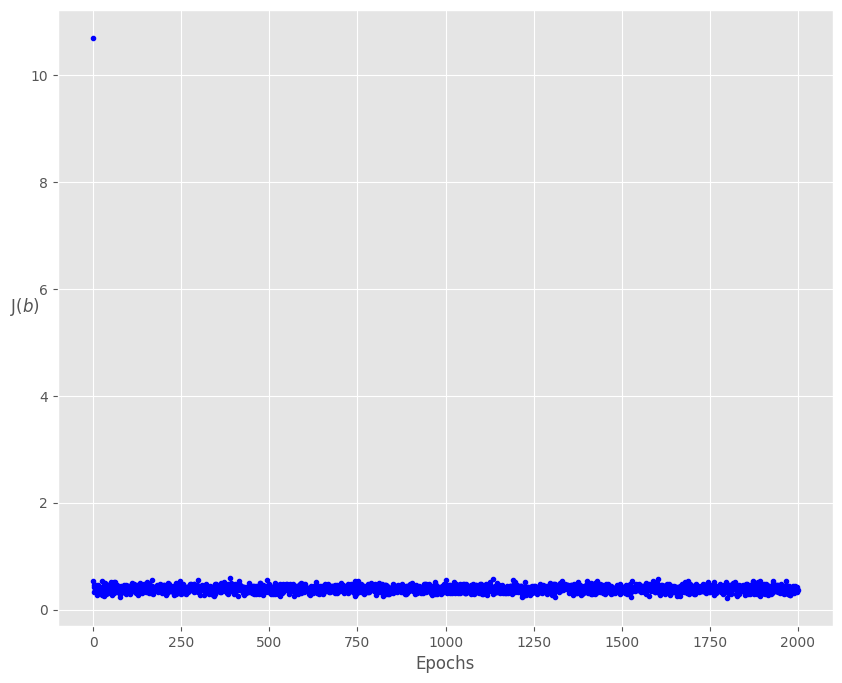

In [20]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('J$(b)$', rotation=0)
ax.set_xlabel('Epochs')
b = np.random.randn(2,1)

ax.plot(range(epochs), cost_history, 'b.');

## Mini Batch Gradient Descent

Mini-batch gradient descent finally takes the best of both worlds and performs an update for every mini-batch of 
$ m $ training examples.

$$ b = b - \alpha \frac{\partial}{\partial b} J(b; x_{(i:i+m)}; y_{(i:i+m)} ) $$

This way,  
1. reduces the variance of the parameter updates, which can lead to more stable convergence
2. can make use of highly optimized matrix optimizations common to state-of-the-art deep learning libraries that make computing the gradient with respect to a mini-batch very efficient. 

Common mini-batch sizes range between 50 and 256, but can vary for different applications. Mini-batch gradient descent is typically the algorithm of choice when training a neural network and the term SGD usually is employed also when mini-batches are used. 

In [21]:
def minibatch_gradient_descent(X, y, b, learning_rate=0.01, epochs=10, batch_size=20):
    """
    Perform mini-batch gradient descent for linear regression.

    Parameters
    ----------
    X : ndarray of shape (n, j)
        Feature matrix without bias column.
    y : ndarray of shape (n, 1)
        Target values.
    b : ndarray of shape (j, 1)
        Initial parameter vector.
    learning_rate : float
        Learning rate.
    epochs : int
        Number of passes over the training data.
    batch_size : int
        Number of samples per mini-batch.

    Returns
    -------
    b : ndarray of shape (j, 1)
        Final learned parameter vector.
    cost_history : ndarray of shape (epochs,)
        True cost on the FULL dataset at the end of each epoch.
    """
    n = X.shape[0]
    cost_history = np.zeros(epochs)
    
    for epoch in range(epochs):
        cost = 0.0
        shuffled_indices = np.random.permutation(n)
        X = X[shuffled_indices]
        y = y[shuffled_indices]
        for ind, i in enumerate(range(0, n, batch_size)):
            print(f"iteration nr:{ind},in epoch nr:{epoch}")
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i, b)

            b = b - (1/batch_size) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(b, X_i, y_i)
        cost_history[epoch]  = cost/(ind+1)     # cost/number of batches
        
    return b, cost_history

In [22]:
lr = 0.01
epochs = 2000

b = np.random.randn(2,1)


b, cost_history = minibatch_gradient_descent(X, y, b, lr, epochs, batch_size=20)


print(f'b_0: {b[0][0]:0.3f},\nb_1: {b[1][0]:0.3f}')
print(f'Final cost:  {cost_history[-1]:0.3f}')

iteration nr:0,in epoch nr:0
iteration nr:1,in epoch nr:0
iteration nr:2,in epoch nr:0
iteration nr:3,in epoch nr:0
iteration nr:4,in epoch nr:0
iteration nr:0,in epoch nr:1
iteration nr:1,in epoch nr:1
iteration nr:2,in epoch nr:1
iteration nr:3,in epoch nr:1
iteration nr:4,in epoch nr:1
iteration nr:0,in epoch nr:2
iteration nr:1,in epoch nr:2
iteration nr:2,in epoch nr:2
iteration nr:3,in epoch nr:2
iteration nr:4,in epoch nr:2
iteration nr:0,in epoch nr:3
iteration nr:1,in epoch nr:3
iteration nr:2,in epoch nr:3
iteration nr:3,in epoch nr:3
iteration nr:4,in epoch nr:3
iteration nr:0,in epoch nr:4
iteration nr:1,in epoch nr:4
iteration nr:2,in epoch nr:4
iteration nr:3,in epoch nr:4
iteration nr:4,in epoch nr:4
iteration nr:0,in epoch nr:5
iteration nr:1,in epoch nr:5
iteration nr:2,in epoch nr:5
iteration nr:3,in epoch nr:5
iteration nr:4,in epoch nr:5
iteration nr:0,in epoch nr:6
iteration nr:1,in epoch nr:6
iteration nr:2,in epoch nr:6
iteration nr:3,in epoch nr:6
iteration nr:4

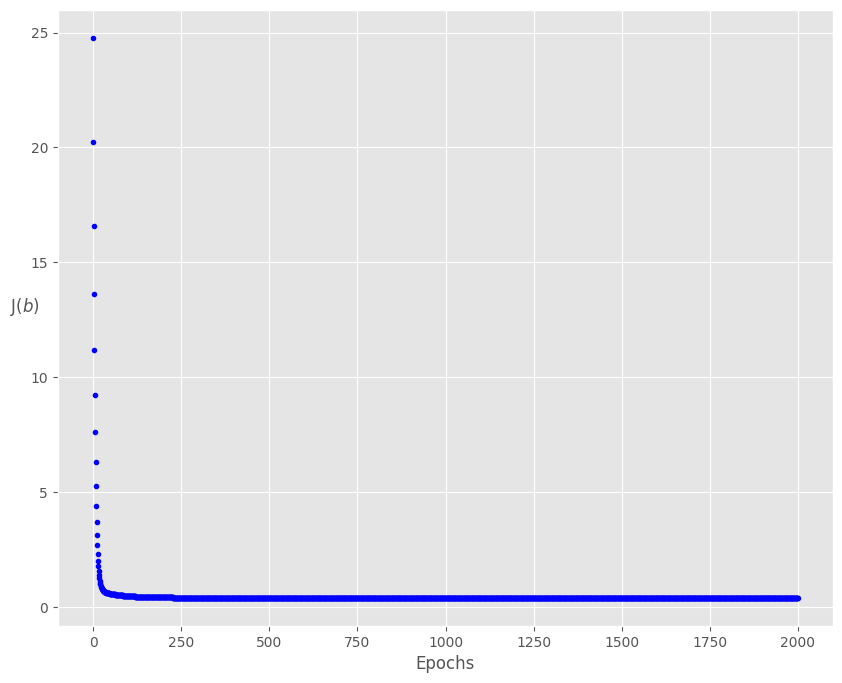

In [23]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('J$(b)$', rotation=0)
ax.set_xlabel('Epochs')
theta = np.random.randn(2,1)

ax.plot(range(epochs), cost_history, 'b.');